# Game of Life


* [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) (or just "Life") is a toy model (a 2D cellular automation) that is not about anything concrete in particular, but it shows how aggregation of a simple rule over time can produce surprising results
    * Aim of the modeling exercise: getting the logic right
* It was invented in 1970 by John Conway (originally using a Go board)
* There is a whole separate wiki dedicated to it - [LifeWiki](https://www.conwaylife.com/wiki/Main_Page)!

The rules are simple, but intentionally selected to produce interesting results:
* Each cell can be in one of the two states (dead/off, or alive/on)
* How a cell changes its state depends in its 8 neighbors (so-called Moore neighborhood)
* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with two or three live neighbours lives on to the next generation.
* Any live cell with more than three live neighbours dies, as if by overpopulation.
* Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

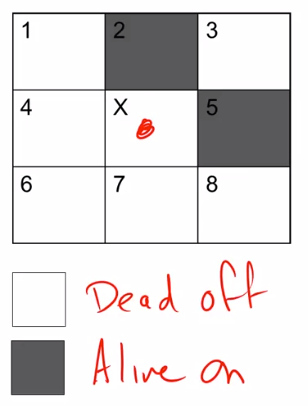

These rules can produce a variety of recurring patterns:

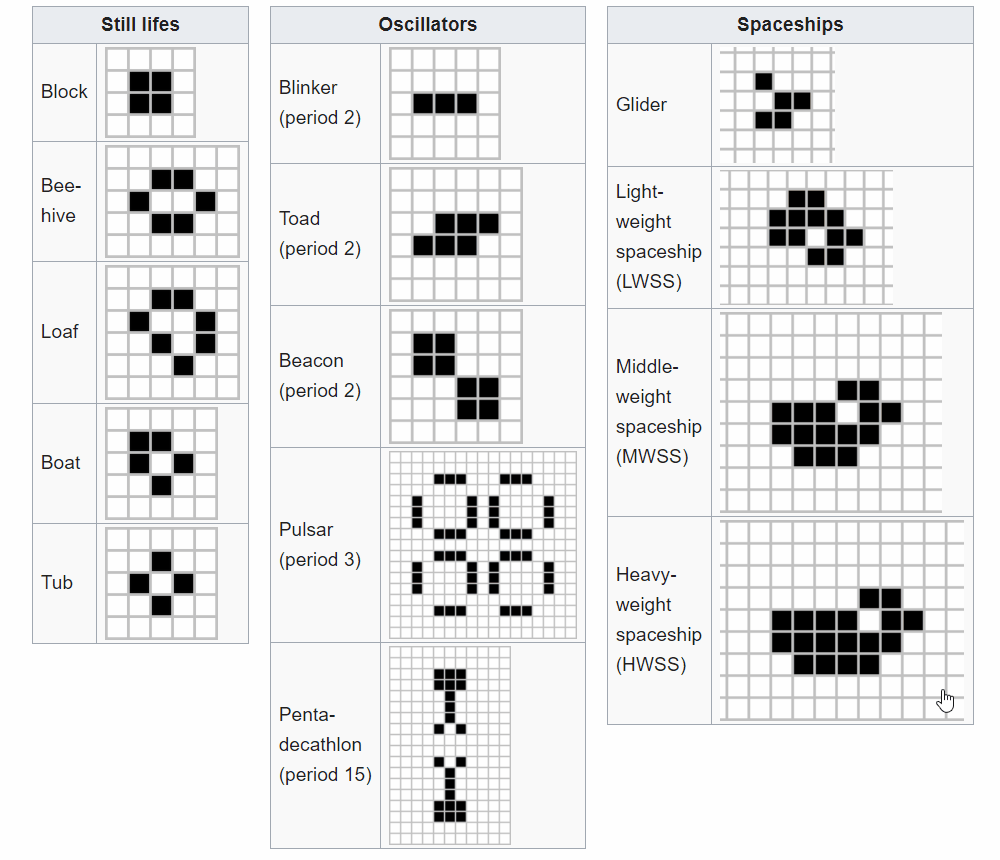

Classes of outcomes:

* Fixed points (e.g. block)
* Alternating (e.g. blinker)
* Random
* Interesting patterns - "complexity" (e.g. glider guns, or - to me even more impressing, *breeders* - see below)

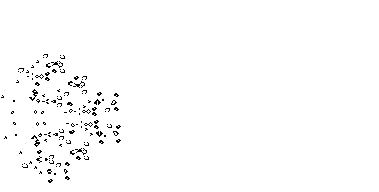

Important ideas:

* **Self-organization**: patterns appear without a designer
* **Emergence**: functionalities appear (gliders, glider gun, counters, computers, ...)

## Game of Life using DynamicGrids

[`DynamicGrids.jl`](https://github.com/cesaraustralia/DynamicGrids.jl) is a package in Julia for simple simulations on grids, such as cellular automata (for more complex simulations, [`Agents.jl`](https://juliadynamics.github.io/Agents.jl/stable/) is recommended).

The package already has built-in rules for the Game of Life, so it is quite easy to do such simulations.

In [1]:
# Setup
using Random # Built-in packages
using DynamicGrids, Plots # External packages
Random.seed!(20210203); # Set seed for reproducibility

In [2]:
init = rand(Bool, 150, 200) # Initial random cell states
output = ArrayOutput(init; tspan=1:100) # Preallocate space for the output
sim!(output, Life()) # Run the sim


100-element ArrayOutput{Array{Bool,2},Array{Array{Bool,2},1},DynamicGrids.Extent{Array{Bool,2},Nothing,Nothing}}:
 [0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 1; 0 0 … 0 0; … ; 0 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 1 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 1 0 … 0 1; 0 1 … 1 0]
 ⋮
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 1 0]
 [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 …


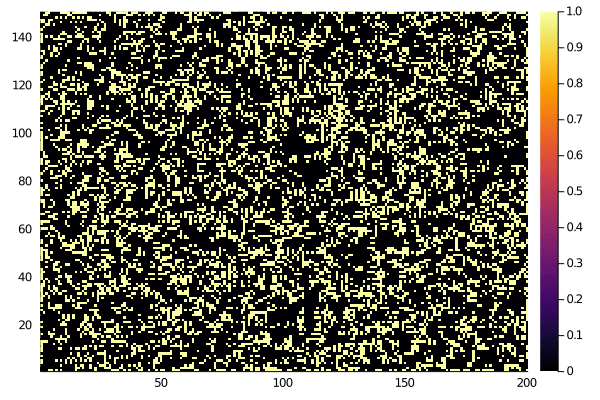

In [3]:
plt = heatmap(output[1])
anim = @animate for i in 2 : 100
    heatmap!(plt, output[i])
end
gif(anim, fps = 10)

TODO: find out why the animation part takes as long as it does and if it can be sped up.